German credit data<br>
Goal:predicting if the customer defaults or not<br>
1000 instances and 21 attributes including target variable<br>
Target majority:minority ratio = 7:3<br>


# EXPLANATION ADDED FOR EVALUATION METRIC

ROC_AUC score is the chosen metric of evaluation as the target variable to be classified is imbalanced and the roc_auc score gives good results for imbalanced data sets and the models can also be evaluated without a threshold value.

<b>Results</b>:
Best Model parameters:<br>
    StackingClassifier(final estimator=<b>Logistic Regression</b>,final_estimator__C= 0.2,stack_method='auto'}) <br>
   and the following five classifiers:
   1.('smote',SMOTE()),('ee',EasyEnsembleClassifier()) #params={'smote__k_neighbors': 3}<br>
   2.RandomForestClassifier()#params={'criterion': 'entropy', 'max_depth': 6, 'max_features': 'auto', 'n_estimators': 100}<br>
   3.LogisticRegression()#params={'C': 0.01, 'penalty': 'l2'}<br>
   4.ExtraTreesClassifier()#params={'criterion': 'entropy', 'max_depth': 5, 'max_features': 'log2', 'n_estimators': 100}<br>
   5.XGBClassifier(random_state=42,early_stopping_rounds=2,objective= 'binary:logistic')#params={'learning_rate': 0.6,'max_depth': 2, 'min_child_weight': 1, 'n_estimators': 50, 'subsample': 1}<br>
   
   
   
Best Mean Cross Validation Score is 0.796098226940192<br>
Best Mean Cross Validation params is {'final_estimator__C': 0.2, 'stack_method': 'auto'}<br>
Train score is 0.9305892081073805<br>
Test score is 0.7841230167354922<br>

In [357]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline 

In [358]:
data=pd.read_csv("creditdata.csv")

In [359]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
default                       1000 non-null int64
account_check_status          950 non-null object
duration_in_month             900 non-null float64
credit_history                950 non-null object
purpose                       950 non-null object
credit_amount                 900 non-null float64
savings                       950 non-null object
present_emp_since             950 non-null object
installment_as_income_perc    950 non-null float64
personal_status_sex           950 non-null object
other_debtors                 950 non-null object
present_res_since             950 non-null float64
property                      950 non-null object
age                           900 non-null float64
other_installment_plans       950 non-null object
housing                       950 non-null object
credits_this_bank             950 non-null float64
job                           950 non-

In [360]:
for x in data.columns:
    print(x, (data[x].isna().sum())/len(data[x])*100)

default 0.0
account_check_status 5.0
duration_in_month 10.0
credit_history 5.0
purpose 5.0
credit_amount 10.0
savings 5.0
present_emp_since 5.0
installment_as_income_perc 5.0
personal_status_sex 5.0
other_debtors 5.0
present_res_since 5.0
property 5.0
age 10.0
other_installment_plans 5.0
housing 5.0
credits_this_bank 5.0
job 5.0
people_under_maintenance 5.0
telephone 5.0
foreign_worker 5.0


In [361]:
data["people_under_maintenance"]=data["people_under_maintenance"].astype('O')

In [362]:
data["people_under_maintenance"].value_counts()

1.0    802
2.0    148
Name: people_under_maintenance, dtype: int64

In [363]:
data["installment_as_income_perc"]=data["installment_as_income_perc"].astype('O')

In [364]:
data["installment_as_income_perc"].value_counts()

4.0    454
2.0    218
3.0    147
1.0    131
Name: installment_as_income_perc, dtype: int64

In [365]:
data["present_res_since"]=data["present_res_since"].astype('O')

In [366]:
data["present_res_since"].value_counts()

4.0    393
2.0    290
3.0    143
1.0    124
Name: present_res_since, dtype: int64

In [367]:
data["credits_this_bank"]=data["credits_this_bank"].astype('O')

In [368]:
data["credits_this_bank"].value_counts()

1.0    603
2.0    315
3.0     26
4.0      6
Name: credits_this_bank, dtype: int64

In [369]:
cat=list(data.columns[data.dtypes=="O"])

In [370]:
cat

['account_check_status',
 'credit_history',
 'purpose',
 'savings',
 'present_emp_since',
 'installment_as_income_perc',
 'personal_status_sex',
 'other_debtors',
 'present_res_since',
 'property',
 'other_installment_plans',
 'housing',
 'credits_this_bank',
 'job',
 'people_under_maintenance',
 'telephone',
 'foreign_worker']

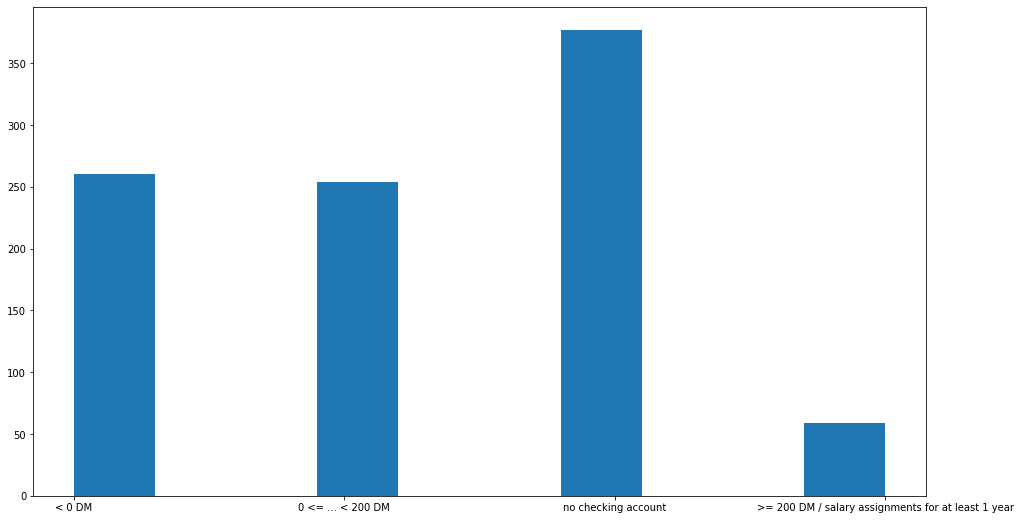

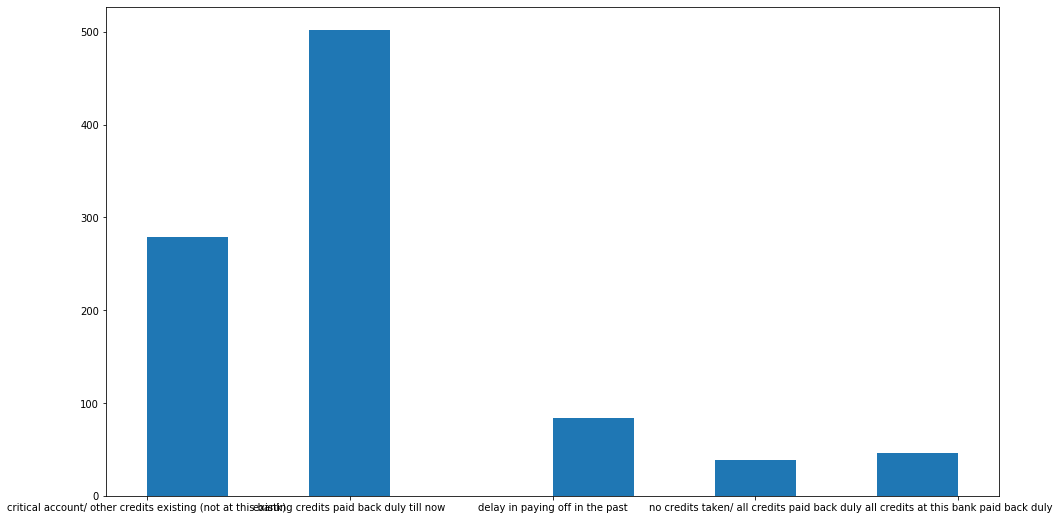

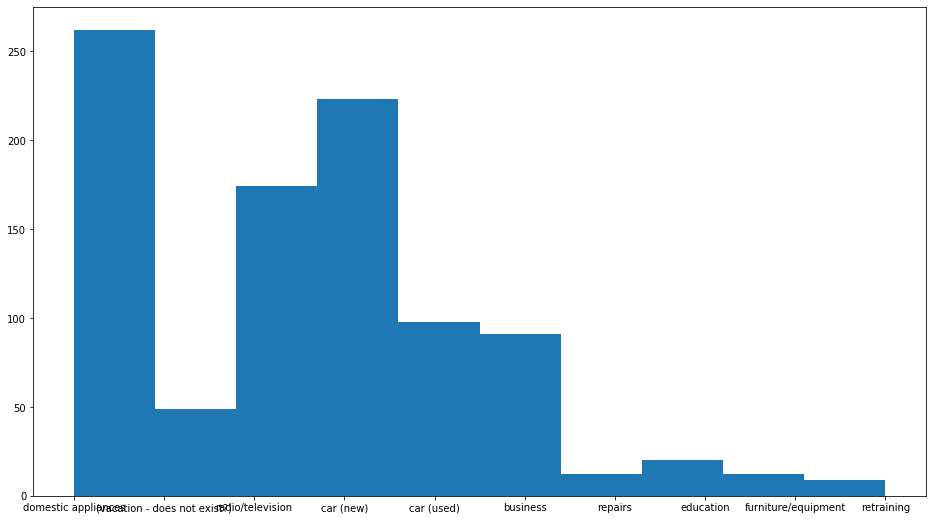

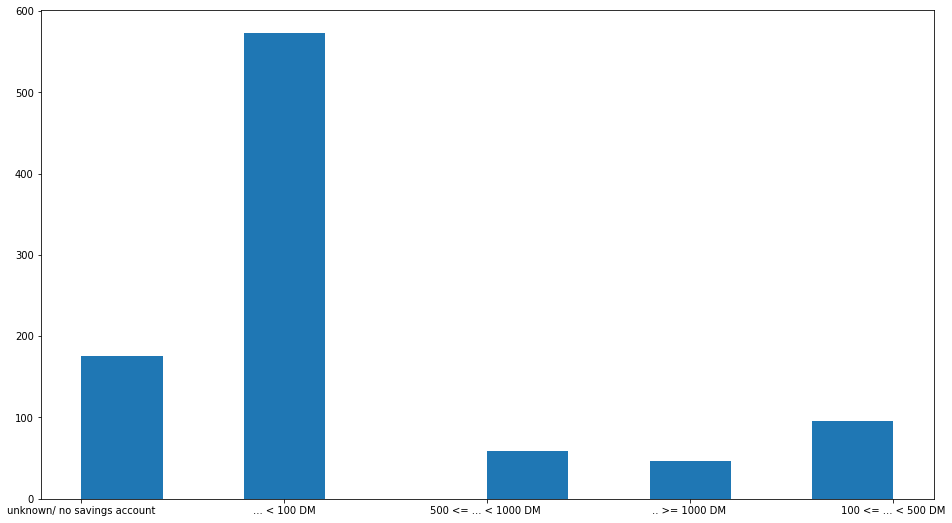

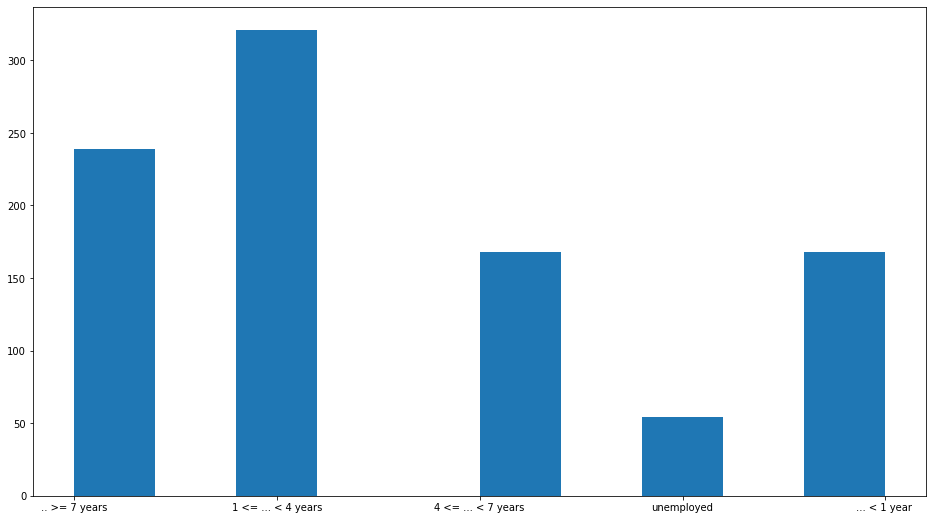

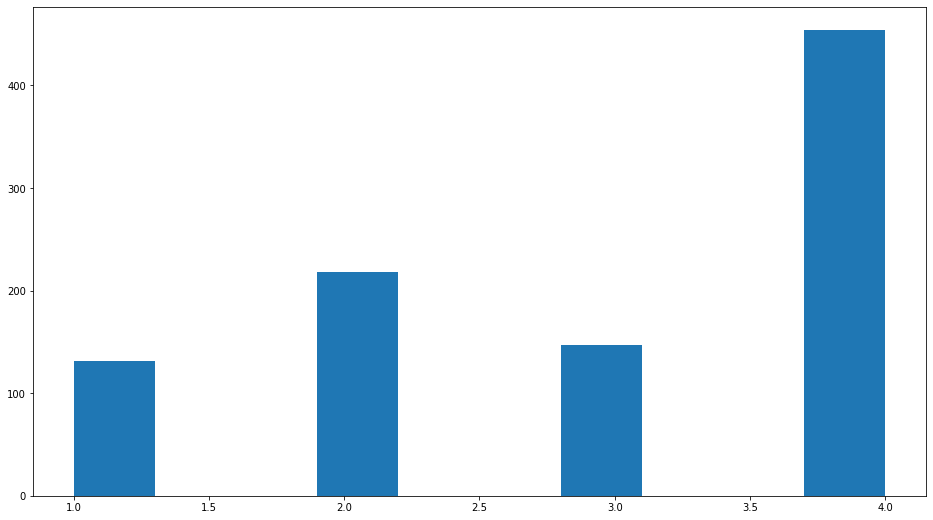

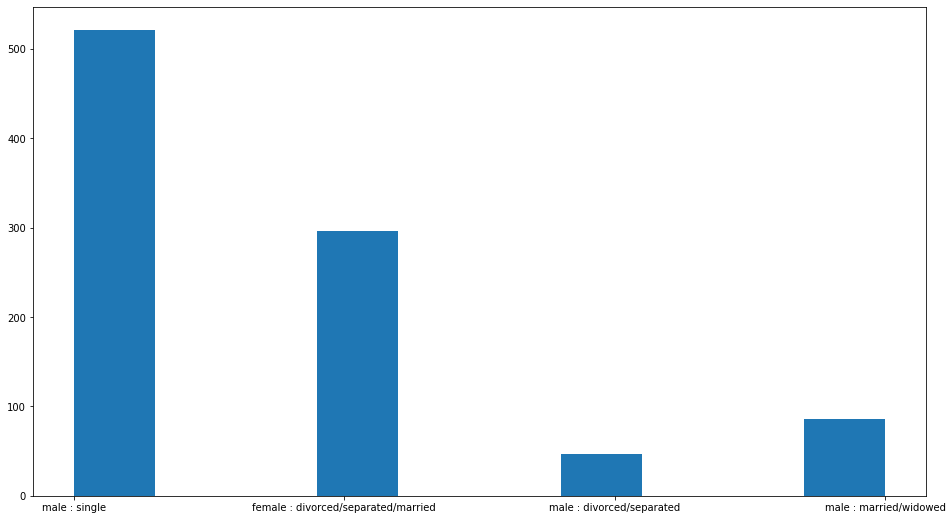

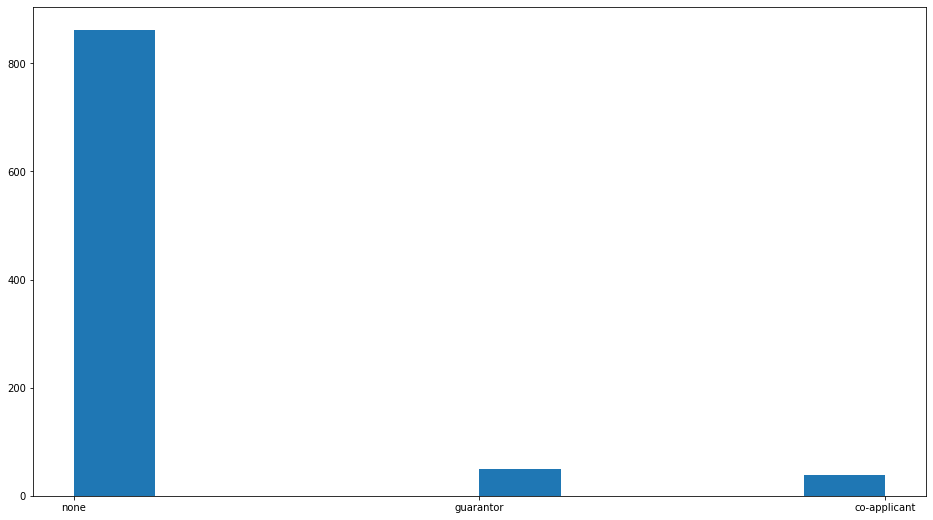

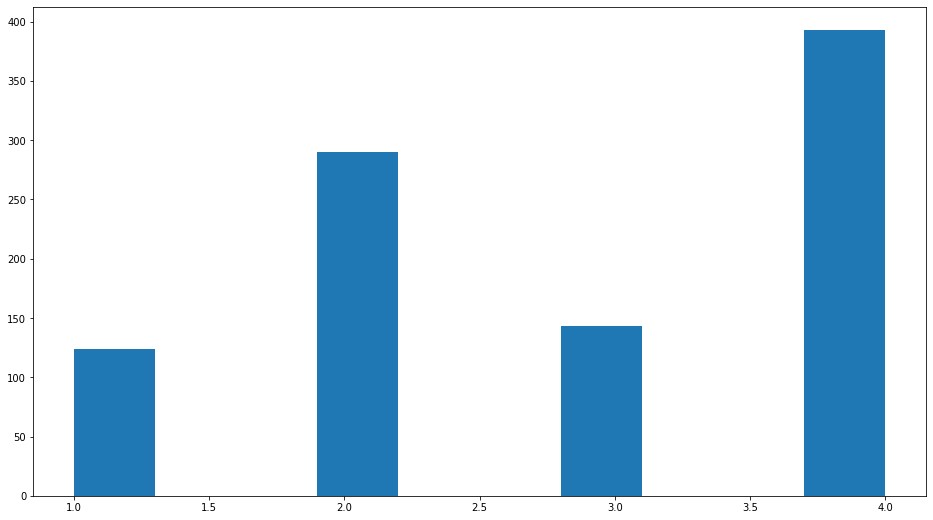

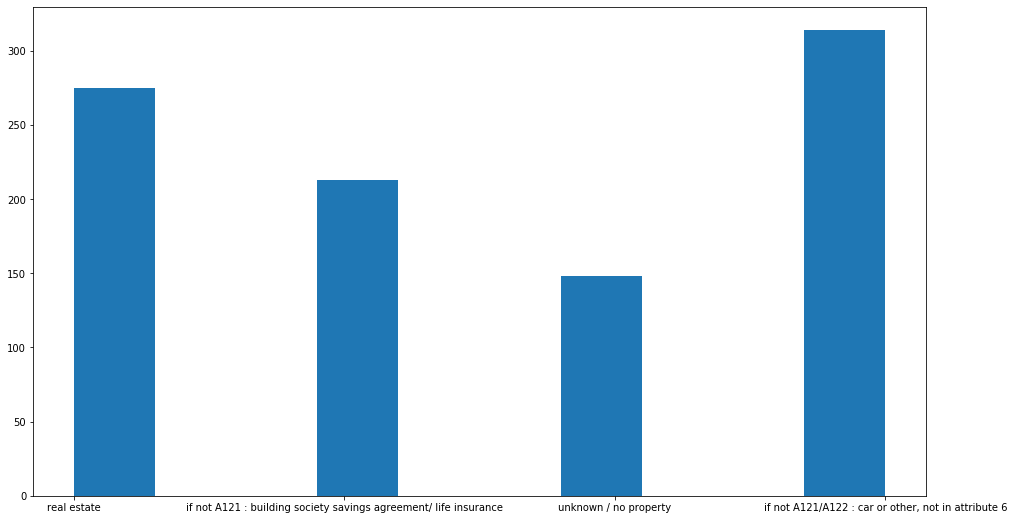

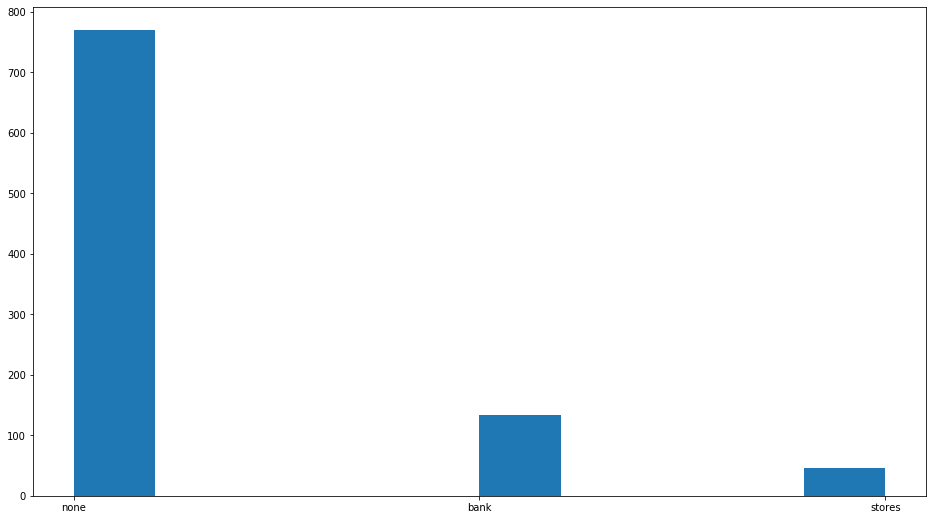

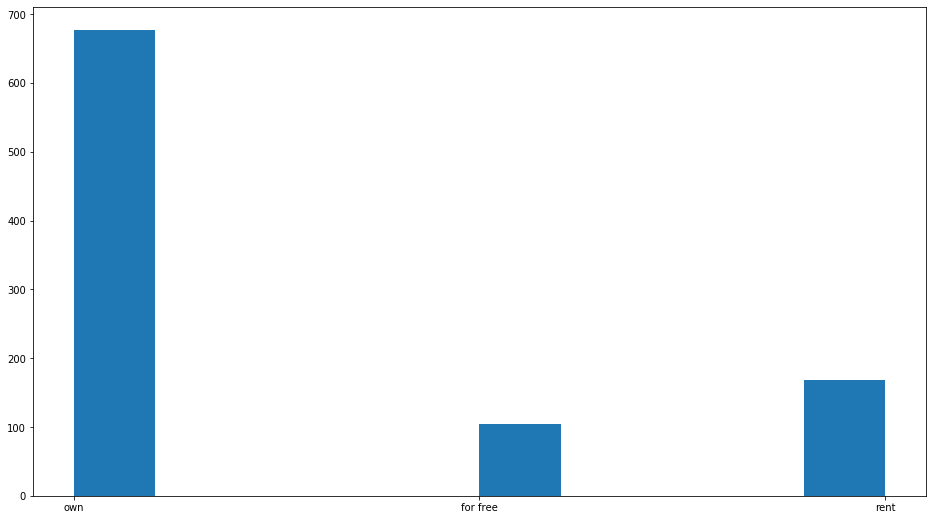

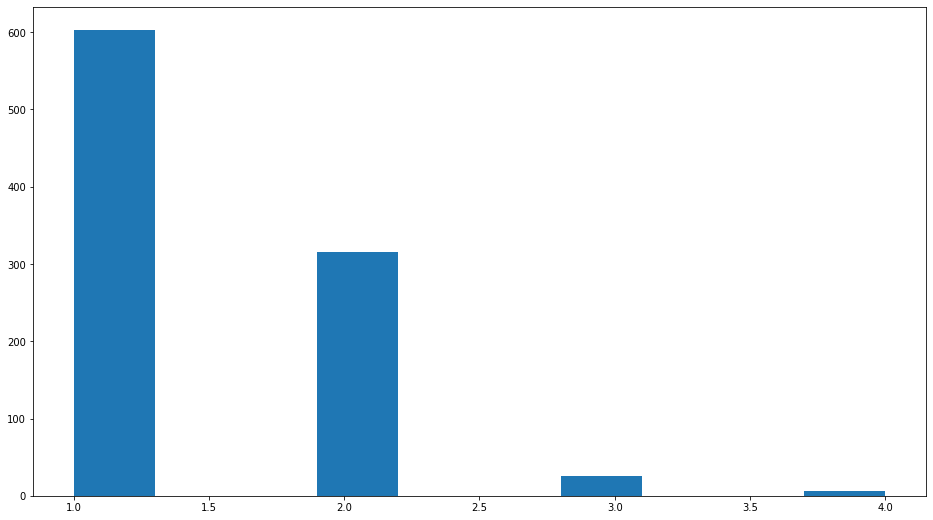

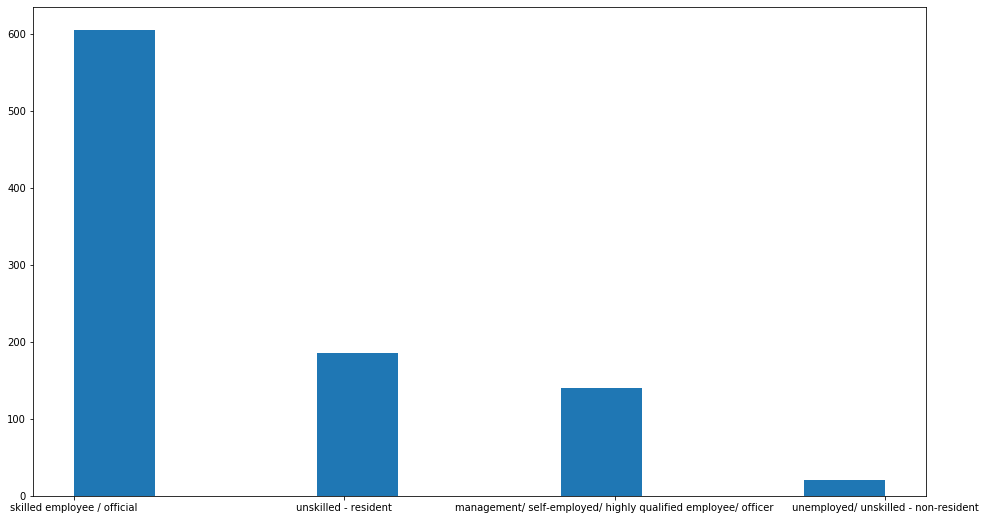

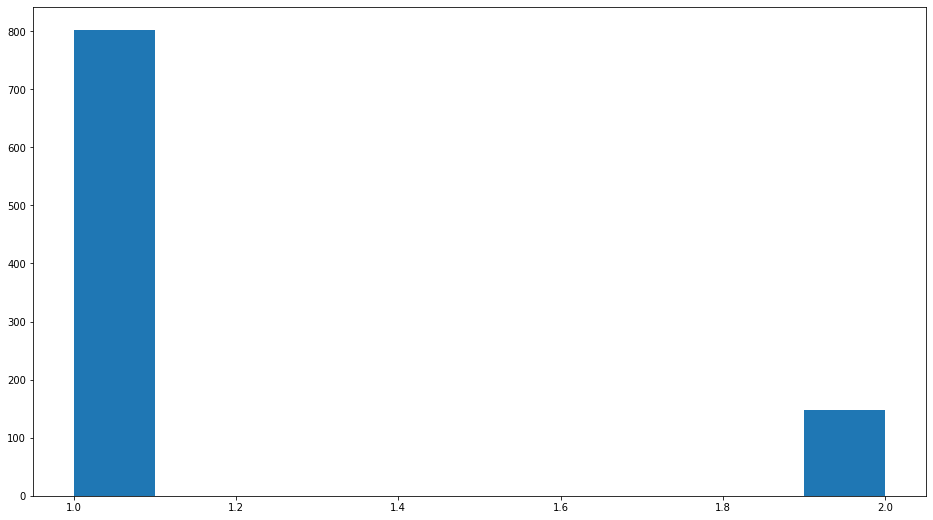

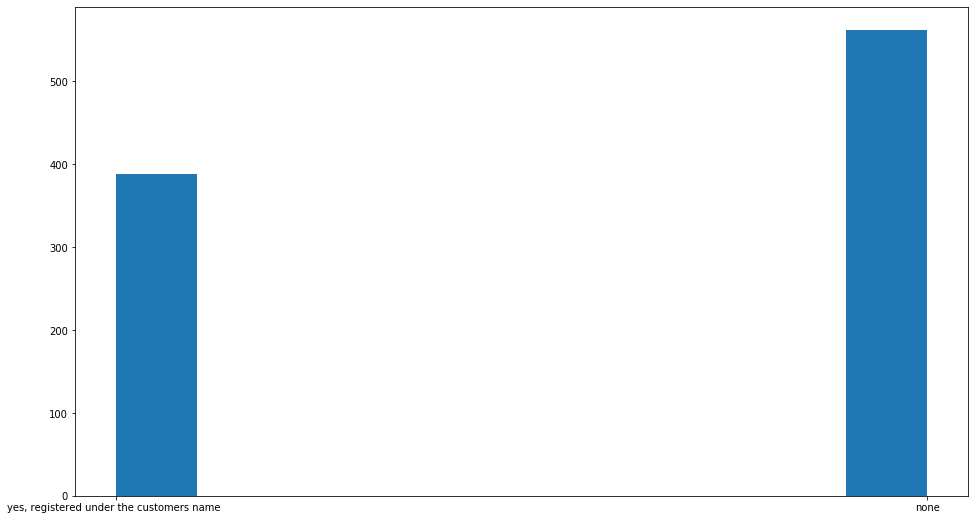

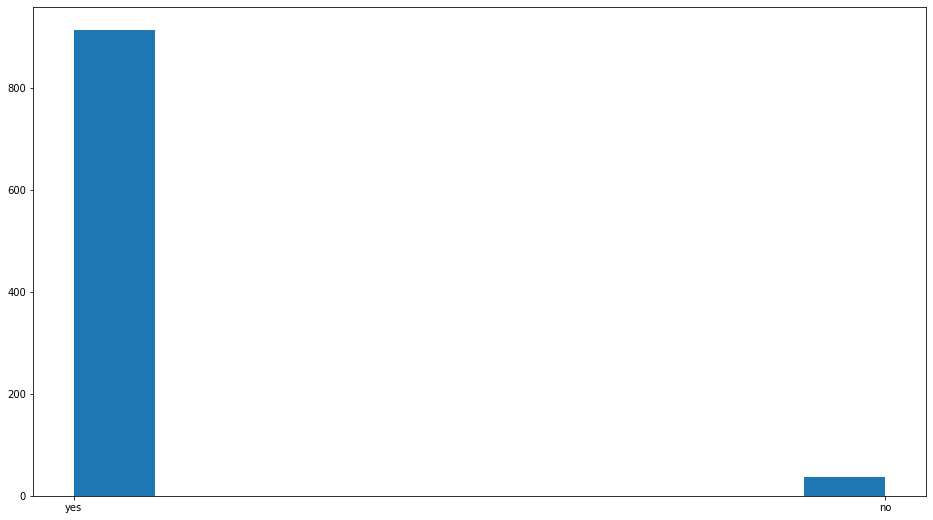

In [334]:
for i,x in enumerate(cat):
    plt.figure(i,figsize=(16,9))
    plt.hist(data[x].dropna())

In [371]:
num=list(data.columns[data.dtypes!="O"])

In [379]:
num.remove('default')

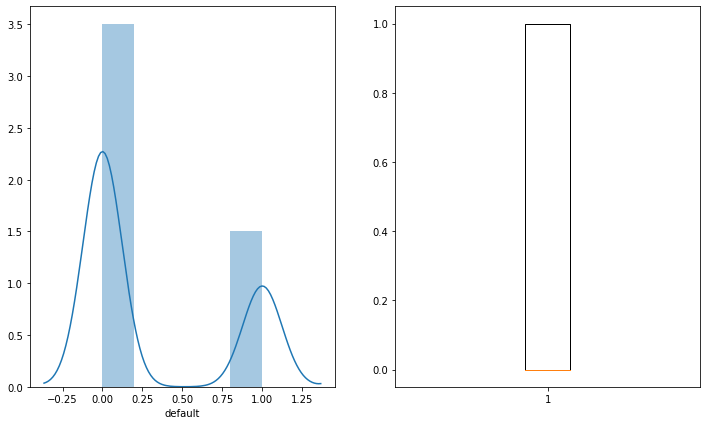

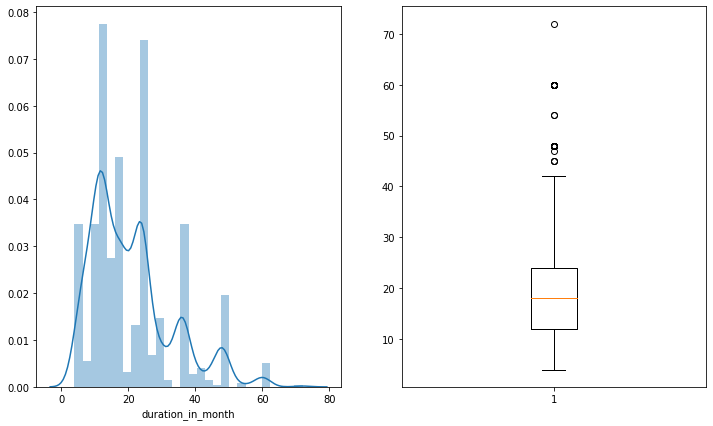

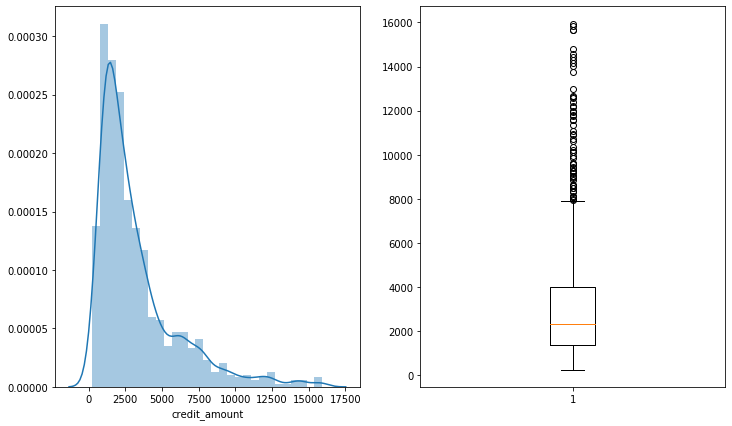

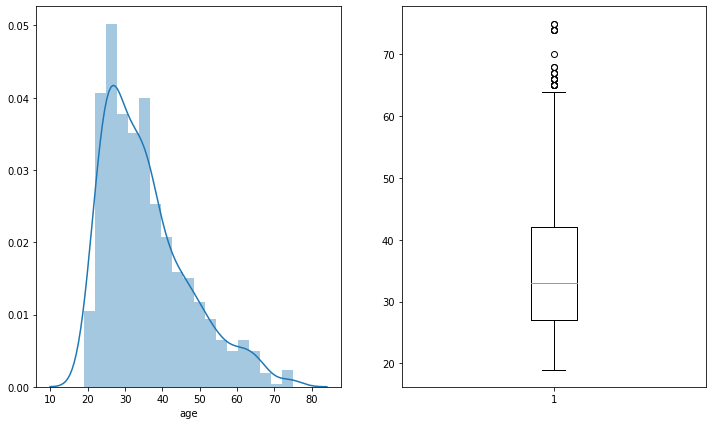

In [373]:
for i,x in enumerate(num):
    plt.figure(i,figsize=(12,7))
    plt.subplot(1,2,1)
    sns.distplot(data[x].dropna())
    plt.subplot(1,2,2)
    plt.boxplot(data[x].dropna())

In [374]:
for x in data.columns:
    print(x, (data[x].isna().sum())/len(data[x])*100)

default 0.0
account_check_status 5.0
duration_in_month 10.0
credit_history 5.0
purpose 5.0
credit_amount 10.0
savings 5.0
present_emp_since 5.0
installment_as_income_perc 5.0
personal_status_sex 5.0
other_debtors 5.0
present_res_since 5.0
property 5.0
age 10.0
other_installment_plans 5.0
housing 5.0
credits_this_bank 5.0
job 5.0
people_under_maintenance 5.0
telephone 5.0
foreign_worker 5.0


In [437]:
from sklearn.pipeline import Pipeline
from feature_engine import missing_data_imputers as mdi
from feature_engine import categorical_encoders as ce
from sklearn.preprocessing import StandardScaler


imputing=Pipeline([ ('imputer_mode', mdi.FrequentCategoryImputer(variables=cat)),
    ('imputer_num', mdi.MeanMedianImputer(imputation_method='median',
                                          variables=num))])
    


In [438]:
encoding=Pipeline([ 
    ('rare_label_enc', ce.RareLabelCategoricalEncoder(
        tol=0.02, n_categories=50, variables=cat)),
    
    ('onehot_enc', ce.OneHotCategoricalEncoder(
    variables=cat,
    drop_last=True)),
    
    ('scale',StandardScaler())
])

In [439]:
from sklearn.model_selection import train_test_split
X = data.drop(columns=['default'])
y = data['default']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [440]:
imputing.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('imputer_mode',
                 FrequentCategoryImputer(variables=['account_check_status',
                                                    'credit_history', 'purpose',
                                                    'savings',
                                                    'present_emp_since',
                                                    'installment_as_income_perc',
                                                    'personal_status_sex',
                                                    'other_debtors',
                                                    'present_res_since',
                                                    'property',
                                                    'other_installment_plans',
                                                    'housing',
                                                    'credits_this_bank', 'job',
                                                    'people_under_m

In [441]:
X_train=imputing.transform(X_train)
X_test=imputing.transform(X_test)



In [442]:
X_train[cat]=X_train[cat].astype('O')
X_test[cat]=X_test[cat].astype('O')

In [443]:
encoding.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('rare_label_enc',
                 RareLabelCategoricalEncoder(n_categories=50, tol=0.02,
                                             variables=['account_check_status',
                                                        'credit_history',
                                                        'purpose', 'savings',
                                                        'present_emp_since',
                                                        'installment_as_income_perc',
                                                        'personal_status_sex',
                                                        'other_debtors',
                                                        'present_res_since',
                                                        'property',
                                                        'other_installment_plans',
                                                        'housing',
                             

In [444]:
X_train=encoding.transform(X_train)
X_test=encoding.transform(X_test)

# BASIC ALGORITHMS

In [452]:
#Logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
logreg=LogisticRegression(max_iter=1000)

logreg_param= {'C': [0.001,0.01,0.1,1,10,100], 'penalty': ['l2']}
logreg_grid = GridSearchCV(logreg, logreg_param,cv=5, return_train_score=True,scoring = 'roc_auc')
logreg_grid.fit(X_train,y_train)

print(f'Best Mean Cross Validation Score is {logreg_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {logreg_grid.best_params_}')
print(f'Train score is {logreg_grid.score(X_train,y_train)}')
print(f'Test score is {logreg_grid.score(X_test,y_test)}')


Best Mean Cross Validation Score is 0.7841527726616214
Best Mean Cross Validation Score is {'C': 0.01, 'penalty': 'l2'}
Train score is 0.8322660666897428
Test score is 0.7734188219952185


In [453]:
# Naive  Algorithm 
from sklearn.dummy import DummyClassifier

In [454]:
dummy = DummyClassifier(strategy='stratified',random_state=123)
dummy.fit(X_train,y_train)
cv_scores = cross_val_score(dummy, X_train, y_train,scoring='roc_auc')

# Mean Cross validation Score
print("Mean Cross-validation scores: {}".format(cv_scores.mean()))
print()

# Check test data set performance
print("Naive Algorithm Test Performance: ", dummy.score(X_test,y_test))

Mean Cross-validation scores: 0.5117253566494927

Naive Algorithm Test Performance:  0.54


In [455]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=0)

#define a list of parameters
param_dtree = {'max_depth': range(1,20)}

#apply grid search
grid_dtree = GridSearchCV(dtree, param_dtree, cv=5, return_train_score = True,scoring = 'roc_auc')
grid_dtree.fit(X_train, y_train)

# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.2f}".format(grid_dtree.best_score_))
print()

#find best parameters
print('Decision Tree parameters: ', grid_dtree.best_params_)

# Check test data set performance
print("Decision Tree Performance: ", grid_dtree.score(X_test,y_test))

Best Mean Cross-validation score: 0.70

Decision Tree parameters:  {'max_depth': 5}
Decision Tree Performance:  0.7409530536839817


In [456]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

# define a list of parameters

param_knn = {'n_neighbors': range(5,25)}

#apply grid search
grid_knn = GridSearchCV(knn, param_knn, cv=5, return_train_score=True,scoring = 'roc_auc')
grid_knn.fit(X_train, y_train)

# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.2f}".format(grid_knn.best_score_))
print()

#find best parameters
print('KNN parameters: ', grid_knn.best_params_)

# Check test data set performance
print("KNN Test Performance: ", grid_knn.score(X_test,y_test))

Best Mean Cross-validation score: 0.72

KNN parameters:  {'n_neighbors': 23}
KNN Test Performance:  0.7599706585524886


In [457]:
#linear SVM
from sklearn.svm import SVC
lsvc=SVC(kernel='linear',probability=True)
lsvc_param= {'C': [0.001,0.01,0.1,1,10,100],}
lsvc_grid = GridSearchCV(lsvc, lsvc_param,cv=5, return_train_score=True,scoring = 'roc_auc' )
lsvc_grid.fit(X_train,y_train)
print(f'Best Mean Cross Validation Score is {lsvc_grid.best_score_}')
print(f'Best params {lsvc_grid.best_params_}')
print(f'Train score is {lsvc_grid.score(X_train,y_train)}')
print(f'Test score is {lsvc_grid.score(X_test,y_test)}')

Best Mean Cross Validation Score is 0.7777586412172158
Best params {'C': 0.01}
Train score is 0.8284489058113149
Test score is 0.752499456639861


In [458]:
#SVM using different kernels
ksvc=SVC(probability=True)
ksvc_param = [{'kernel': ['rbf'],
               'C': [ 0.1, 1, 10],
               'gamma': [0.1, 1, 10]},
             {'kernel': ['sigmoid'],
               'C': [ 0.1, 1, 10],
               'gamma': [ 0.1, 1, 10]}]

ksvc_grid = GridSearchCV(ksvc, ksvc_param,cv=5, return_train_score=True,scoring = 'roc_auc' )
ksvc_grid.fit(X_train,y_train)
print(f'Best Mean Cross Validation Score is {ksvc_grid.best_score_}')
print(f'Best params {ksvc_grid.best_params_}')
print(f'Train score is {ksvc_grid.score(X_train,y_train)}')
print(f'Test score is {ksvc_grid.score(X_test,y_test)}')

Best Mean Cross Validation Score is 0.756431725000169
Best params {'C': 0.1, 'gamma': 0.1, 'kernel': 'sigmoid'}
Train score is 0.6812141840698436
Test score is 0.714029558791567


In [459]:
#random forest
from sklearn.ensemble import RandomForestClassifier
rfc =RandomForestClassifier(random_state=0)
rfc_param = { 
    'n_estimators': [50, 100],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6],
    'criterion' :['gini', 'entropy']
}

grid_rf = GridSearchCV(rfc, rfc_param,cv=5, return_train_score=True, scoring = 'roc_auc')
grid_rf.fit(X_train,y_train)

print(f'Best Mean Cross Validation Score is {grid_rf.best_score_}')
print(f'Best params {grid_rf.best_params_}')
print(f'Train score is {grid_rf.score(X_train,y_train)}')
print(f'Test score is {grid_rf.score(X_test,y_test)}')

Best Mean Cross Validation Score is 0.7758810021251368
Best Mean Cross Validation Score is {'criterion': 'entropy', 'max_depth': 6, 'max_features': 'auto', 'n_estimators': 100}
Train score is 0.922329910388062
Test score is 0.7777113670941099


In [460]:
#Extra trees
from sklearn.ensemble import ExtraTreesClassifier

etc= ExtraTreesClassifier(random_state=42)
etc_param = { 
    'n_estimators': [50,100],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [5,6,7,8],
    'criterion' :['gini', 'entropy']
}
grid_et = GridSearchCV(etc, etc_param,cv=5, return_train_score=True,scoring = 'roc_auc' )
grid_et.fit(X_train,y_train)

print(f'Best Mean Cross Validation Score is {grid_et.best_score_}')
print(f'Best Mean Cross Validation Score is {grid_et.best_params_}')
print(f'Train score is {grid_et.score(X_train,y_train)}')
print(f'Test score is {grid_et.score(X_test,y_test)}')

Best Mean Cross Validation Score is 0.7632002775422598
Best Mean Cross Validation Score is {'criterion': 'entropy', 'max_depth': 5, 'max_features': 'log2', 'n_estimators': 100}
Train score is 0.886475520172301
Test score is 0.7782547272332101


In [461]:
#Gradient boosting
from sklearn.ensemble import GradientBoostingClassifier
gbc= GradientBoostingClassifier(random_state=42)
gbc_param = {
              'max_depth' : [4,5,6],
              'n_estimators' : [100,150],
              'learning_rate' : [0.5,1.0,2],
             }
grid_gd = GridSearchCV(gbc, gbc_param,cv=5, return_train_score=True,scoring = 'roc_auc' )
grid_gd.fit(X_train,y_train)

print(f'Best Mean Cross Validation Score is {grid_gd.best_score_}')
print(f'Best Mean Cross Validation Score is {grid_gd.best_params_}')
print(f'Train score is {grid_gd.score(X_train,y_train)}')
print(f'Test score is {grid_gd.score(X_test,y_test)}')

Best Mean Cross Validation Score is 0.7555519635672197
Best Mean Cross Validation Score is {'learning_rate': 0.5, 'max_depth': 5, 'n_estimators': 150}
Train score is 0.999048113534095
Test score is 0.7405998695935666


In [462]:
#XGB 
from  xgboost import XGBClassifier
xgbc= XGBClassifier(random_state=42,early_stopping_rounds=2,objective= 'binary:logistic')
xgbc_param = {
              'max_depth' : [2,4,6],
              'n_estimators' : [50,100,150],
              'learning_rate' : [0.1,0.5,0.6,0.8],
               'min_child_weight' : [1,3,5,7],
                'subsample':[0.6,0.7,0.8,0.9,1]
             }
xgbc_grid = GridSearchCV(xgbc, xgbc_param,cv=5, return_train_score=True,scoring = 'roc_auc' )
xgbc_grid.fit(X_train,y_train)
print(f'Best Mean Cross Validation Score is {xgbc_grid.best_score_}')
print(f'Best params {xgbc_grid.best_params_}')
print(f'Train score is {xgbc_grid.score(X_train,y_train)}')
print(f'Test score is {xgbc_grid.score(X_test,y_test)}')

Best Mean Cross Validation Score is 0.7859315175191562
Best params {'learning_rate': 0.6, 'max_depth': 2, 'min_child_weight': 1, 'n_estimators': 50, 'subsample': 1}
Train score is 0.9485019806930504
Test score is 0.7612475548793741


In [464]:
classifiers = [('lsvm',lsvc_grid.best_estimator_),
            ('rf',grid_rf.best_estimator_),('logisr',logreg_grid.best_estimator_),
            ('et',grid_et.best_estimator_),('xgb',xgbc_grid.best_estimator_)]

In [465]:
from sklearn.ensemble import StackingClassifier
sclf1 = StackingClassifier(estimators= classifiers
                            , final_estimator=LogisticRegression())
sclf1_param = {
              'final_estimator__C' : [0.1,0.2],
              'stack_method':['auto', 'predict_proba']
             }
sclf1_grid = GridSearchCV(sclf1, sclf1_param,cv=5, return_train_score=True,scoring='roc_auc' )
sclf1_grid.fit(X_train,y_train)

print(f'Best Mean Cross Validation Score is {sclf1_grid.best_score_}')
print(f'Best Mean Cross Validation params is {sclf1_grid.best_params_}')
print(f'Train score is {sclf1_grid.score(X_train,y_train)}')
print(f'Test score is {sclf1_grid.score(X_test,y_test)}')

Best Mean Cross Validation Score is 0.796034258481966
Best Mean Cross Validation params is {'final_estimator__C': 0.1, 'stack_method': 'auto'}
Train score is 0.9175416330141148
Test score is 0.7810258639426212


# Cost Sensitive Algorithms

In [466]:
#Cost sensitive logistic regession
params = {   
    'class_weight': [{0:100,1:1}, {0:10,1:1}, {0:1,1:1}, {0:1,1:10}, {0:1,1:100}],
}

cgrid_logreg= GridSearchCV(LogisticRegression(solver='lbfgs'), params, cv=5, n_jobs=2, scoring='roc_auc')
cgrid_logreg.fit(X_train, y_train)

print("Best parameters: {}".format(cgrid_logreg.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(cgrid_logreg.best_score_))

Best parameters: {'class_weight': {0: 1, 1: 1}}
Best Mean cross-validation score: 0.77


In [468]:
#lsvc
params = {
    'class_weight': [{0:100,1:1}, {0:10,1:1}, {0:1,1:1}, {0:1,1:10}, {0:1,1:100}],
}
#apply grid search
cgrid_svc= GridSearchCV(SVC(kernel='linear',probability=True), params, cv=5, n_jobs=2, scoring='roc_auc')
cgrid_svc.fit(X_train, y_train)

print("Best parameters: {}".format(cgrid_svc.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(cgrid_svc.best_score_))

Best parameters: {'class_weight': {0: 1, 1: 1}}
Best Mean cross-validation score: 0.76


In [469]:
#Decison tree
params = { 
    'class_weight': [{0:100,1:1}, {0:10,1:1}, {0:1,1:1}, {0:1,1:10}, {0:1,1:100}],
}
#apply grid search
cgrid_dtree= GridSearchCV(DecisionTreeClassifier(), params, cv=5, n_jobs=2, scoring='roc_auc')
cgrid_dtree.fit(X_train, y_train)

print("Best parameters: {}".format(cgrid_dtree.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(cgrid_dtree.best_score_))

Best parameters: {'class_weight': {0: 10, 1: 1}}
Best Mean cross-validation score: 0.62


In [470]:
#xgb
params = { 
    'scale_pos_weight': [1, 10, 25, 50, 75, 99, 100, 1000],
}
#apply grid search
cgrid_xgboost= GridSearchCV(XGBClassifier(random_state=42,early_stopping_rounds=2,objective= 'binary:logistic'), params, cv=5, n_jobs=2, scoring='roc_auc')
cgrid_xgboost.fit(X_train, y_train)

print("Best parameters: {}".format(cgrid_xgboost.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(cgrid_xgboost.best_score_))

Best parameters: {'scale_pos_weight': 50}
Best Mean cross-validation score: 0.76


In [471]:
#Random forest
from sklearn.model_selection import RepeatedStratifiedKFold
rf = RandomForestClassifier(n_estimators=100, class_weight='balanced')

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

scores = cross_val_score(rf, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)

print('Mean ROC AUC: %.3f' % scores.mean())

Mean ROC AUC: 0.759


In [492]:
#extratrees
et = ExtraTreesClassifier(n_estimators=50, class_weight='balanced')

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

scores = cross_val_score(rf, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)

print('Mean ROC AUC: %.3f' % scores.mean())

Mean ROC AUC: 0.732


In [474]:
pip install -U imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [475]:
#Bagging decision tree with under sampling
from imblearn.ensemble import BalancedBaggingClassifier

b_dtree = BalancedBaggingClassifier()

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

scores = cross_val_score(b_dtree, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)

print('Mean ROC AUC: %.3f' % scores.mean())

Mean ROC AUC: 0.719


# Data Sampling Algorithms

In [476]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

In [477]:
#decisiontreee
pipe_roc_dtree = Pipeline([('smote',SMOTE()),('dtree',DecisionTreeClassifier(max_depth=5))])
param_roc_dtree = {'smote__k_neighbors': [1,2,3,4,5]}

ogrid_dtree= GridSearchCV(pipe_roc_dtree,param_roc_dtree, cv=5, n_jobs=2, scoring='roc_auc')
ogrid_dtree.fit(X_train, y_train)

print("Best parameters: {}".format(ogrid_dtree.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(ogrid_dtree.best_score_))

Best parameters: {'smote__k_neighbors': 5}
Best Mean cross-validation score: 0.69


In [479]:
#logistic regression
pipe_roc_lg = Pipeline([('smote',SMOTE()),('lg',LogisticRegression())])
param_lg = {'smote__k_neighbors': [1,2,3,4,5]}

ogrid_lg= GridSearchCV(pipe_roc_lg,param_lg, cv=5, n_jobs=2, scoring='roc_auc')
ogrid_lg.fit(X_train, y_train)

print("Best parameters: {}".format(ogrid_lg.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(ogrid_lg.best_score_))

Best parameters: {'smote__k_neighbors': 5}
Best Mean cross-validation score: 0.76


In [480]:
#knn
pipe_roc_knn = Pipeline([('smote',SMOTE()),('knn',KNeighborsClassifier(n_neighbors=6))])
param_roc_knn = {'smote__k_neighbors': [1,2,3,4,5]}

ogrid_knn= GridSearchCV(pipe_roc_knn,param_roc_knn, cv=5, n_jobs=2, scoring='roc_auc')
ogrid_knn.fit(X_train, y_train)

print("Best parameters: {}".format(ogrid_knn.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(ogrid_knn.best_score_))

Best parameters: {'smote__k_neighbors': 3}
Best Mean cross-validation score: 0.69


In [482]:
#svm
pipe_roc_svm = Pipeline([('smote',SMOTE()),('svm',SVC(C=10,gamma=0.1,kernel='rbf'))])
param_roc_svm = {'smote__k_neighbors': [1,2,3,4,5]}

ogrid_svm= GridSearchCV(pipe_roc_svm,param_roc_svm, cv=5, n_jobs=2, scoring='roc_auc')
ogrid_svm.fit(X_train, y_train)

print("Best parameters: {}".format(ogrid_svm.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(ogrid_svm.best_score_))

Best parameters: {'smote__k_neighbors': 2}
Best Mean cross-validation score: 0.69


In [489]:
#randomforest
pipe_roc_rf = Pipeline([('smote',SMOTE()),('rf',RandomForestClassifier(n_estimators=50,criterion='gini',
                                                                       max_features='auto'))])
param_roc_rf = {'smote__k_neighbors': [1,2,3,4,5],
                'rf__max_depth' : [4,5]}

ogrid_rf= GridSearchCV(pipe_roc_rf,param_roc_rf, cv=5, n_jobs=2, scoring='roc_auc')
ogrid_rf.fit(X_train, y_train)

print("Best parameters: {}".format(ogrid_rf.best_params_))
print("Best Mean cross-validation score: {}".format(ogrid_rf.best_score_))

Best parameters: {'rf__max_depth': 4, 'smote__k_neighbors': 1}
Best Mean cross-validation score: 0.772654992743407


In [488]:
#xgb
pipe_roc_xgb = Pipeline([('smote',SMOTE()),('xgb',XGBClassifier(random_state=42,
                                                                            early_stopping_rounds=2,
                                                                            n_estimators=100,
                                                                            objective ='binary:logistic',
                                                                            max_depth = 4,
                                                                             ))])
param_roc_xgb = {'smote__k_neighbors': [1,2,3,4,5],
                 'xgb__learning_rate' : [0.1,0.5]}

ogrid_xgb= GridSearchCV(pipe_roc_xgb,param_roc_xgb, cv=5, n_jobs=2, scoring='roc_auc')
ogrid_xgb.fit(X_train, y_train)

print("Best parameters: {}".format(ogrid_xgb.best_params_))
print("Best Mean cross-validation score: {}".format(ogrid_xgb.best_score_))

Best parameters: {'smote__k_neighbors': 5, 'xgb__learning_rate': 0.1}
Best Mean cross-validation score: 0.7743428583544251


In [487]:
#easy ensemble classifier
from imblearn.ensemble import EasyEnsembleClassifier
pipe_roc_ee = Pipeline([('smote',SMOTE()),('ee',EasyEnsembleClassifier())])
param_roc_ee = {'smote__k_neighbors': [1,2,3,4,5]}

ogrid_ee= GridSearchCV(pipe_roc_ee,param_roc_ee, cv=5, n_jobs=2, scoring='roc_auc')
ogrid_ee.fit(X_train, y_train)

print("Best parameters: {}".format(ogrid_ee.best_params_))
print("Best Mean cross-validation score: {}".format(ogrid_ee.best_score_))

Best parameters: {'smote__k_neighbors': 3}
Best Mean cross-validation score: 0.7616668285973841


In [490]:
#top 5 estimators
estimators_ = [('ee',ogrid_ee.best_estimator_),
            ('rf',grid_rf.best_estimator_),('lg',logreg_grid.best_estimator_),
            ('et',grid_et.best_estimator_),('xgb',xgbc_grid.best_estimator_)]

In [491]:
from sklearn.ensemble import StackingClassifier
sclf2 = StackingClassifier(estimators= estimators_
                            , final_estimator=LogisticRegression())
sclf2_param = {
              'final_estimator__C' : [0.1,0.2],
              'stack_method':['auto']
             }
sclf2_grid = GridSearchCV(sclf2, sclf2_param,cv=5, return_train_score=True,scoring='roc_auc' )
sclf2_grid.fit(X_train,y_train)

print(f'Best Mean Cross Validation Score is {sclf2_grid.best_score_}')
print(f'Best Mean Cross Validation params is {sclf2_grid.best_params_}')
print(f'Train score is {sclf2_grid.score(X_train,y_train)}')
print(f'Test score is {sclf2_grid.score(X_test,y_test)}')

Best Mean Cross Validation Score is 0.796098226940192
Best Mean Cross Validation params is {'final_estimator__C': 0.2, 'stack_method': 'auto'}
Train score is 0.9305892081073805
Test score is 0.7841230167354922
